In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
import pandas as pd

In [20]:
customers_file = "/content/drive/MyDrive/Zeotap/Customers.csv"
products_file = "/content/drive/MyDrive/Zeotap/Products.csv"
transactions_file = "/content/drive/MyDrive/Zeotap/Transactions.csv"

In [21]:
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)

In [22]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [23]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [24]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [25]:
# Convert date columns to datetime for easier analysis
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

<ipython-input-26-a9d3efe0c575>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")


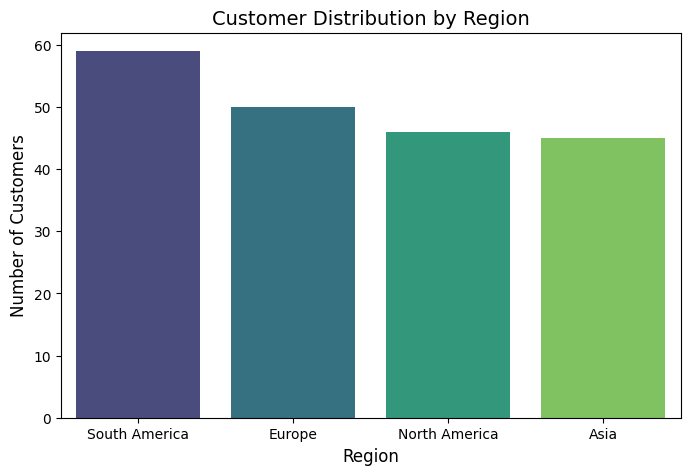

In [26]:
# 1. Regional distribution of customers
region_distribution = customers_df['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_distribution.index, y=region_distribution.values, palette="viridis")
plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

<ipython-input-27-20c263b45279>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="magma")


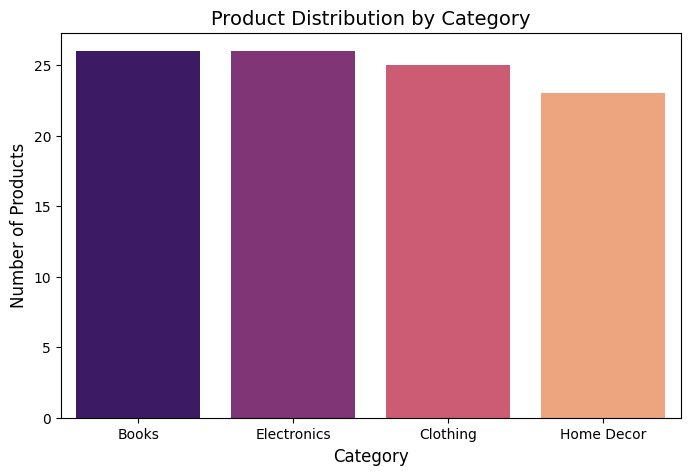

In [27]:
# 2. Product category popularity
category_distribution = products_df['Category'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=category_distribution.index, y=category_distribution.values, palette="magma")
plt.title("Product Distribution by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Products", fontsize=12)
plt.show()

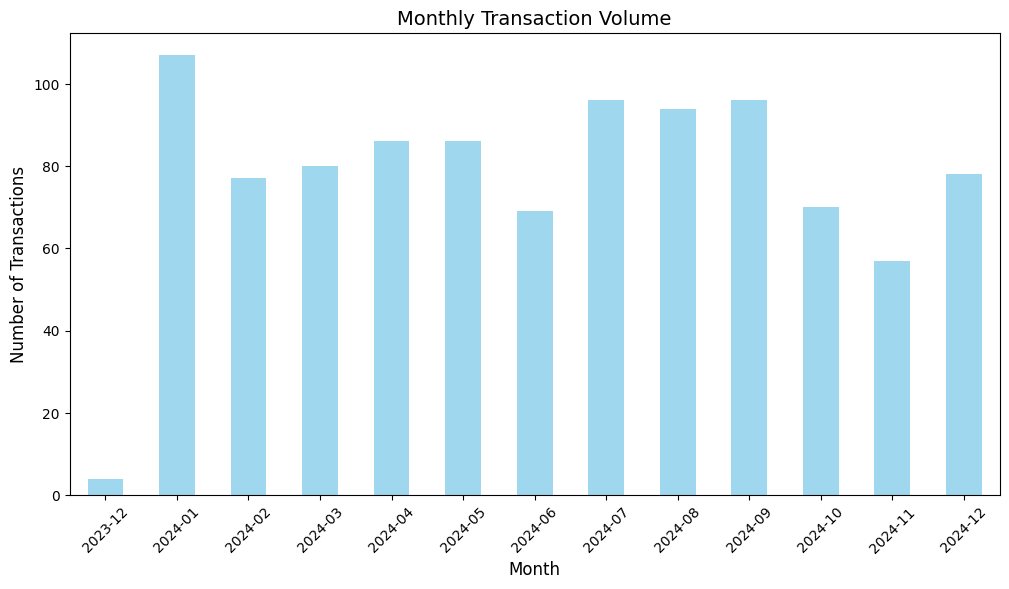

In [28]:
# 3. Transaction volume over time
transactions_df['TransactionMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_transactions = transactions_df['TransactionMonth'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
monthly_transactions.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title("Monthly Transaction Volume", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.show()

<ipython-input-29-9c724c5571d8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm", orient="h")


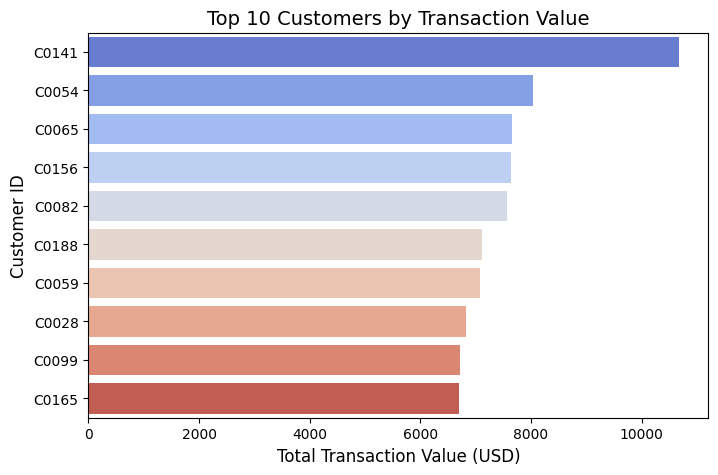

In [29]:
# 4. Top customers by total transaction value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().nlargest(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="coolwarm", orient="h")
plt.title("Top 10 Customers by Transaction Value", fontsize=14)
plt.xlabel("Total Transaction Value (USD)", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.show()

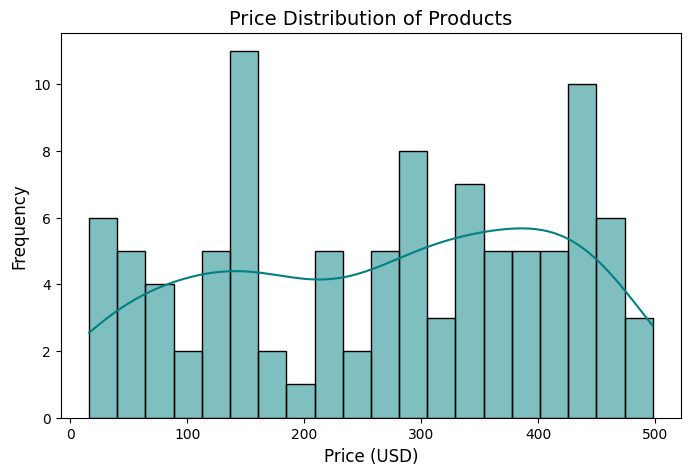

In [30]:
# 5. Price distribution of products
plt.figure(figsize=(8, 5))
sns.histplot(products_df['Price'], kde=True, color="teal", bins=20)
plt.title("Price Distribution of Products", fontsize=14)
plt.xlabel("Price (USD)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()